In [150]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
user="postgres"
password=""

In [46]:
def make_query(host, database, user, password, query):

    conn = psycopg2.connect(
        host=host,
        database=database,
        user=user,
        password=password
    )

    cur = conn.cursor()
    cur.execute(query)

    results = cur.fetchall()
    cols = [desc[0] for desc in cur.description]

    conn.close()

    return results, cols



In [47]:
query = '''
SELECT 
	COUNT(nation) count_nation,
	nation
FROM db_annp.athlete
GROUP BY nation 
ORDER BY count_nation DESC;
'''

In [48]:
res, cols = make_query(host="localhost", database="postgres", user=user, password=password, query=query)

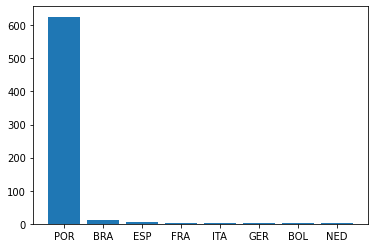

In [49]:
xx = list()
yy = list()

for i in range(len(res)):
    xx.append(res[i][0])
    yy.append(res[i][1])
plt.bar(x=yy, height=xx)
plt.show()

In [184]:
query = '''
SELECT 
	COUNT(gender) count_gender,
	gender
FROM db_annp.athlete
GROUP BY gender 
ORDER BY count_gender DESC;
'''

In [185]:
res, cols = make_query(host="localhost", database="postgres", user="postgres", password="asdasd", query=query)

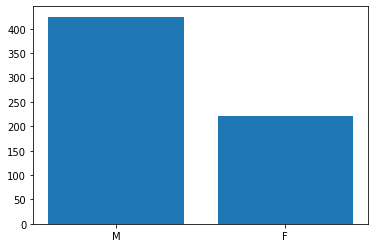

In [52]:
xx = list()
yy = list()

for i in range(len(res)):
    xx.append(res[i][0])
    yy.append(res[i][1])
plt.bar(x=yy, height=xx)
plt.show()

In [271]:
query = '''
    SELECT 
        nation,
        gender,
        count(*)
    FROM db_annp.athlete
    GROUP BY CUBE (nation, gender)
    ORDER BY nation, gender NULLS LAST;
'''

In [272]:
res, cols = make_query(host="localhost", database="postgres", user="postgres", password="asdasd", query=query)

In [317]:
def get_info_for_bars(res):

    countries = []
    gender = []
    for el in res:
        if el[0] not in countries and el[0] is not None:
            countries.append(el[0])
        elif el[1] not in gender and el[1] is not None:
            gender.append(el[1])
        else:
                pass

    nat_gen = [(c, g) for c in countries for g in gender]

    resn = []
    for el in res:
        if el[0] is None or el[1] is None:
            pass
        else:
            resn.append((el[0], el[1]))
    
    diff = list(set(nat_gen) - set(resn))
    
    for i in range(len(diff)):
        diff[i] = diff[i] + (0,)
    
    res_f = []
    for el in res:
        if el[0] is None or el[1] is None:
            pass
        else:
            res_f.append((el[0], el[1], el[2]))
    
    res_f = (res_f + diff)
    res_f.sort()
    count_female = []
    count_male = []

    for row in res_f:
        if row[1] == "F":
            count_female.append(row[2])
        elif row[1] == "M":
            count_male.append(row[2])
        else:
            pass
        
    return countries, count_male, count_female

In [318]:
countries, count_male, count_female = get_info_for_bars(res)

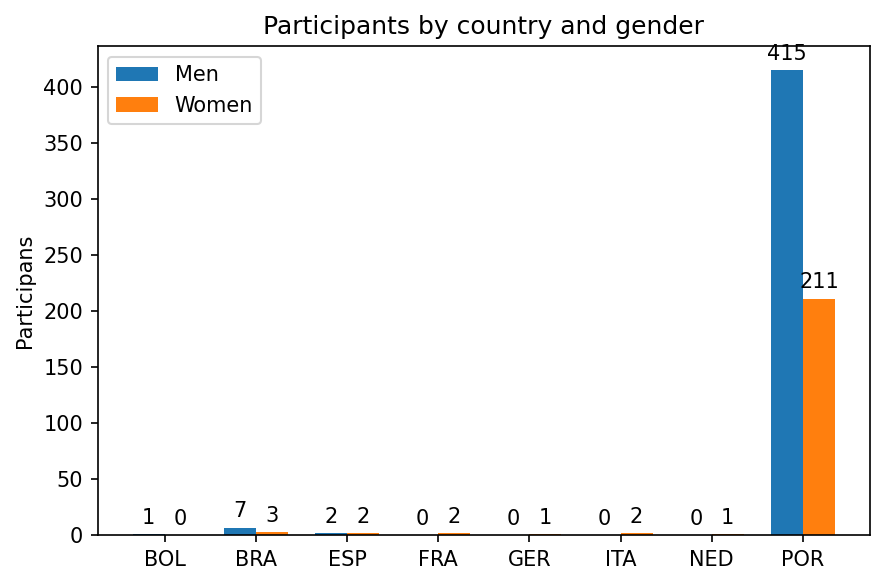

In [319]:
count_male
count_female
countries

x = np.arange(len(countries))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=150)
rects1 = ax.bar(x - width/2, count_male, width, label='Men')
rects2 = ax.bar(x + width/2, count_female, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Participans')
ax.set_title('Participants by country and gender')
ax.set_xticks(x, countries)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()